**Section I: Import the Data**

Imports and Read in File

In [60]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

In [61]:
adult = pd.read_csv("../../assets/datasets/adult.csv")

**Section II: Format the Data**

Convert the data to a Pandas dataframe to work with the data:

In [62]:
df_adult = pd.DataFrame(adult)
df_adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small


Convert the categorical Data to numeric for our analysis. **HINT:** Refer to lesson 1.1 for writing a function of this sort

In [42]:
# # Droping NA's and mapping simple categoricals
# df_adult.dropna(axis = 0, inplace=True)
# df_adult.income = df_adult.income.map({'small':1, 'large' : 0})
# df_adult.sex = df_adult.sex.map({'Male':1, 'Female' : 0})

In [46]:
# Creating functions for mapping non simple categoricals
def name_to_numeric(x,column):
    listy_column_values = list(df_adult[column].unique())
    for i in range(len(listy_column_values)):
        if x == listy_column_values[i]:
            return i

non_numeric_columns = list(df_adult.drop(list(df_adult._get_numeric_data().columns.values),axis=1).columns.values)

for col in non_numeric_columns:
    df_adult[col] = df_adult[col].apply(lambda x: name_to_numeric(x, col))

df_adult.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0.0,77516,0,13,0,0.0,0,0,0,2174,0,40,0.0,0.0
1,50,1.0,83311,0,13,1,1.0,1,0,0,0,0,13,0.0,0.0
2,38,2.0,215646,1,9,2,2.0,0,0,0,0,0,40,0.0,0.0
3,53,2.0,234721,2,7,1,2.0,1,1,0,0,0,40,0.0,0.0
4,28,2.0,338409,0,13,1,3.0,2,1,1,0,0,40,1.0,0.0


In [64]:
# Convert the categorical Data to numeric for our analysis. 
# Using label encoder this time :)
from sklearn.preprocessing import LabelEncoder, StandardScaler
df_adult_2 = pd.DataFrame()

for x in df_adult.drop(list(df_adult._get_numeric_data()),axis=1):
    le = LabelEncoder()
    df_adult_2[x] = le.fit_transform(df_adult[x])

df_adult_2.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,7,9,4,1,1,4,1,39,2
1,6,9,2,4,0,4,1,39,2
2,4,11,0,6,1,4,1,39,2
3,4,1,2,6,0,2,1,39,2
4,4,9,2,10,5,2,0,5,2


Apply the functions you just wrote and append the results to the dataframe

**Section III: Examine the Data**

Plot the Data to see the distributions our our target markets; plot multiple indicators to see the relationships *IE: Education and Income*

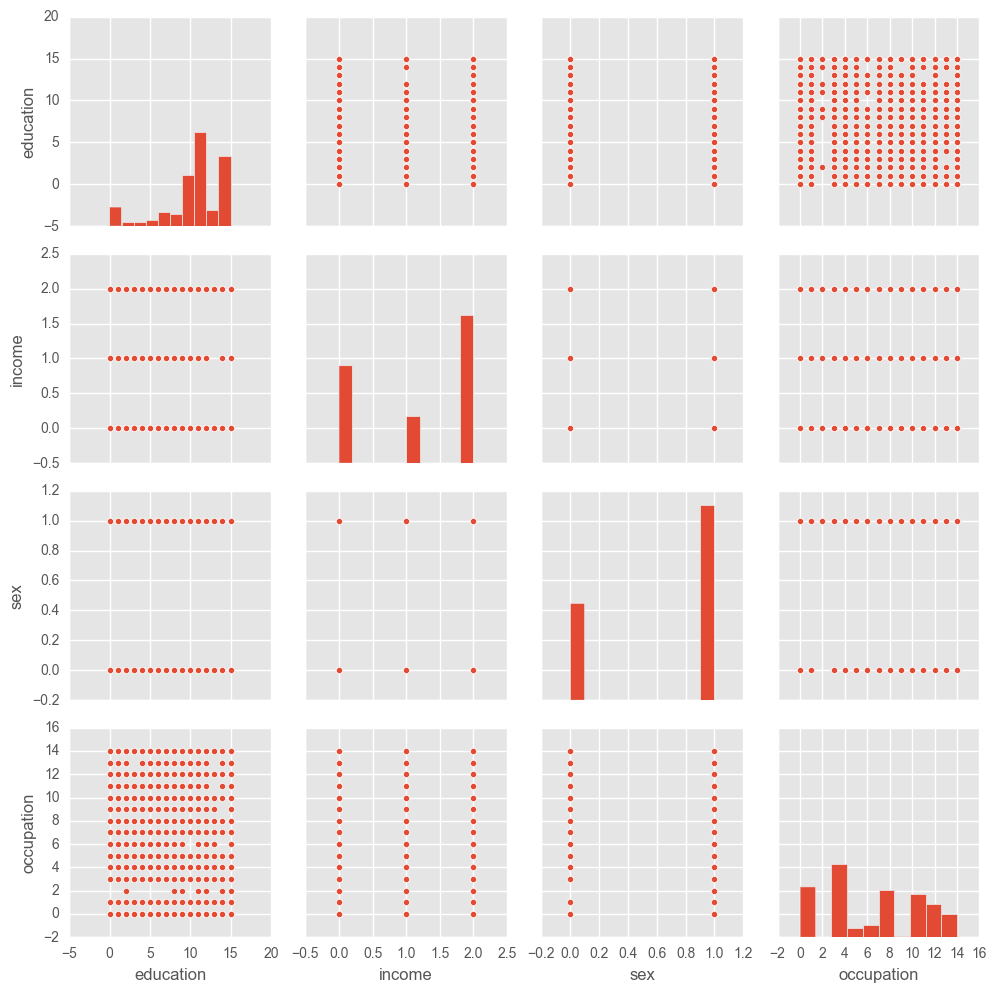

In [65]:
import seaborn as sns
sns.pairplot(df_adult_2, vars=["education", "income","sex","occupation"])

**Section IV: Prepare for Clustering**

Create a New Dataframe with just numerical data for the analysis

In [83]:
df_adult_numerical = df_adult._get_numeric_data()

# Scale the data
scaler = StandardScaler()
df_adult_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_adult_numerical),columns=list(df_adult_numerical.columns.values))

df_adult_numerical_scaled.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.025996,-1.061979,1.136512,0.146932,-0.217127,-0.034087
1,0.828308,-1.007104,1.136512,-0.144804,-0.217127,-2.213032
2,-0.046942,0.246034,-0.419335,-0.144804,-0.217127,-0.034087
3,1.047121,0.426663,-1.197259,-0.144804,-0.217127,-0.034087
4,-0.776316,1.408530,1.136512,-0.144804,-0.217127,-0.034087


Check for NaN and Infinite Numbers - Our data is messy!

In [ ]:
np.any(np.isnan(...))

In [84]:
# Convert to the Pandas Array to a Numpy Matrix - Your function will only take numerical inputs
matrix_num = df_adult_numerical.as_matrix(columns=None)

**Section V: Clustering Analysis**

Cluster the Data to our our target groups. **BONUS**: Perform multiple clustering tests on various indicator variables

In [86]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(matrix_num)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Get the labels and centroids

In [91]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print labels
print centroids

[0 0 0 ..., 1 0 0]
[[  3.92168338e+01   1.41749799e+05   1.01356766e+01   1.10664160e+03
    8.90555694e+01   4.04419851e+01]
 [  3.70040307e+01   3.26704513e+05   9.91338023e+00   1.00020296e+03
    8.30598277e+01   4.03663163e+01]]


Compute the Silhoutte Score to measure your analysis

In [ ]:
# metrics.silhouette_score(dn, labels, metric='euclidean')